# Fast Food Chain Marketing Campaign A/B Testing

## Introduction
- A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.
- In this project, campaign and promotion are interchangeable.

## Scope

### Problem
- Which marketing campaign attracts the most customers to try the new item?
- Should the fast food chain add the new item to its menu?

### Goal
- Identify the association between the market and the promotion, the location and the promotion, the day of week and the promotion, the promotion and sales.
- Decide which campaign should be used.
- Identify which location generates the most sales.

### Action
- We assume that each location that the campaigns are promoted are far enough from each other that the audience of the campaigns are completely randomly chosen and do not travel to other locations, and they are not aware of the other campaigns.
- Three campaigns were placed in 10 markets with three market sizes (small, medium, large) in a duration of four weeks. Then total sales of each campaign are recorded.
- Calculate the standard deviation of three promotions' sales and see if the sales for three promotions are normally distributed. If the standard deviations are similar and the sales are normally distributed, I will apply ANOVA and Tukey for hypothesis test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('WA_Marketing-Campaign.csv')

In [3]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
df.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

No null values.

In [5]:
df.duplicated().sum()

0

No duplicate rows.

In [6]:
df.describe(include='all')

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548,548.000000,548.000000,548.000000,548.000000,548.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Medium,NaN,NaN,NaN,NaN,NaN
freq,NaN,320,NaN,NaN,NaN,NaN,NaN
mean,5.715328,NaN,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,NaN,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,NaN,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,NaN,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,NaN,708.000000,12.000000,3.000000,3.250000,60.477500


In [7]:
df.dtypes

MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

After observing the dataset, it is certain that MarketID, LocationID, Promotion, Week columns should be categorical instead of numerical. I will convert these column into str data type.

In [8]:
df = df.astype({'MarketID': 'str', 'LocationID': 'str', 'Promotion': 'str', 'week': 'str'})

In [9]:
df.dtypes

MarketID             object
MarketSize           object
LocationID           object
AgeOfStore            int64
Promotion            object
week                 object
SalesInThousands    float64
dtype: object

In [10]:
df.describe(include='all')

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548,548,548,548.000000,548,548,548.000000
unique,10,3,137,NaN,3,4,NaN
top,3,Medium,709,NaN,2,1,NaN
freq,88,320,4,NaN,188,137,NaN
mean,NaN,NaN,NaN,8.503650,NaN,NaN,53.466204
std,NaN,NaN,NaN,6.638345,NaN,NaN,16.755216
min,NaN,NaN,NaN,1.000000,NaN,NaN,17.340000
25%,NaN,NaN,NaN,4.000000,NaN,NaN,42.545000
50%,NaN,NaN,NaN,7.000000,NaN,NaN,50.200000
75%,NaN,NaN,NaN,12.000000,NaN,NaN,60.477500


In [17]:
df.Promotion.value_counts()

2    188
3    188
1    172
Name: Promotion, dtype: int64

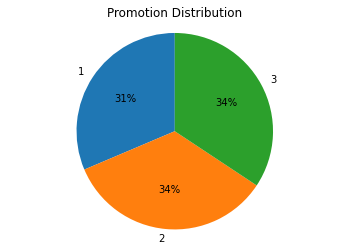

In [18]:
promo = [172, 188, 188]

plt.pie(promo, labels=['1', '2', '3'], autopct='%d%%', startangle=90)
plt.axis('equal')
plt.title('Promotion Distribution')
plt.show()

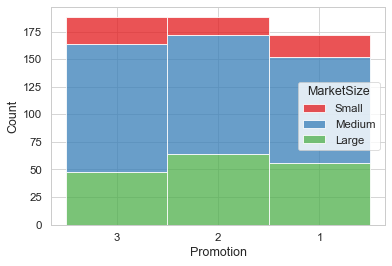

In [23]:
plt.clf()
sns.set_context('paper', font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette('Set1')
ax1 = sns.histplot(data=df, x='Promotion', hue='MarketSize', multiple='stack', hue_order=['Small', 'Medium', 'Large'])
plt.show()

From the plots above, we can see that the number of applications to three campaigns are mostly equal, with the campaign 1 a little lower than campaign 2 and campaign 3. If we desegment the three campaigns according to market sizes, the small market got the lowest count in all three promotions. The medium market got the highest count.

In [26]:
grouped_promotion = df.groupby('Promotion')
df2 = pd.DataFrame({col: vals['AgeOfStore'] for col, vals in grouped_promotion})

median_age = df2.median()
median_age.sort_values(inplace=True, ascending=False)
median_age.index

Index(['3', '2', '1'], dtype='object')

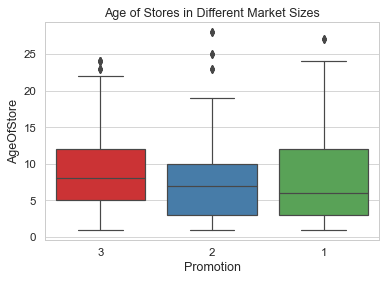

In [42]:
plt.clf()
sns.set_context('paper', font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette('Set1')
ax2 = sns.boxplot(data=df, x='Promotion', y='AgeOfStore', order=median_age.index)
plt.title('Age of Stores in Different Market Sizes')
plt.show()

From the boxplot above, we can see that the age profiles of the stores are similar for three promotions. 

<Figure size 432x288 with 0 Axes>

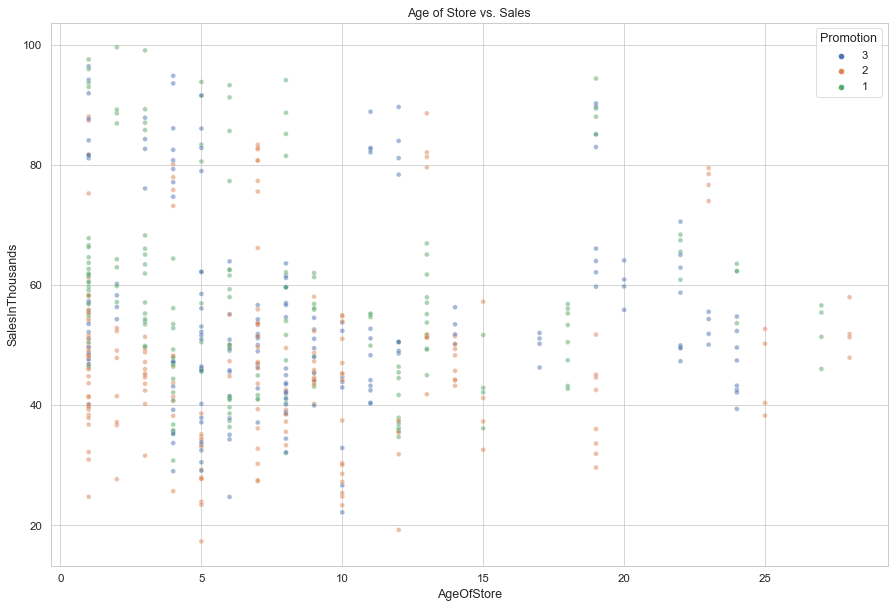

In [37]:
plt.clf()
ax3 = plt.figure(figsize=(15,10))
sns.set_context('paper', font_scale=1.3)
sns.scatterplot(data=df, x='AgeOfStore', y='SalesInThousands', hue='Promotion', palette='deep', alpha=0.5)
plt.title('Age of Store vs. Sales')
plt.show()

From the scatter plot above, we can see that as the age of the stores increases, the number of sales decreases. If we look at the top of the plot, where sales are higher, there seem to be more green dots and blue dots in the area than orange dots. At the bottom of the plot, where sales are lower, there are more orange dots than green and blue dots. It can mean that campaign 1 and campaign 3 made more higher sales than campaign 2. However, this does not determine which campaign made the most sales.

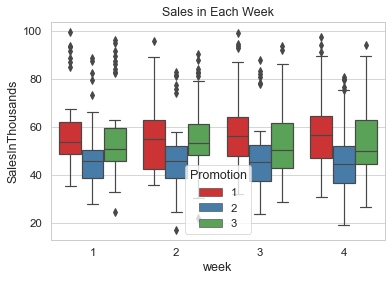

In [39]:
plt.clf()
sns.set_context('paper', font_scale=1.3)
sns.set_style('whitegrid')
sns.boxplot(data=df, x='week', y='SalesInThousands', hue='Promotion', order=['1', '2', '3', '4'], hue_order=['1', '2', '3'])
plt.title('Sales in Each Week')
plt.show()

From the boxplot above, we can see that the sales made in each week are similar, with week 1 a little lower than the next three weeks. Campaign 1 and campaign 3 have higher sales in general than campaign 2, which confirms the conclusion from the 'Age of Stores vs. Sales' scatter plot above.

### Hypothesis Test
To see if this A/B test qualifies for the ANOVA and Tukey test, we need to calculate the std and distribution of the sales record for each promotion.

In [43]:
sales_promo1 = df['SalesInThousands'][df['Promotion'] == '1']
sales_promo2 = df['SalesInThousands'][df['Promotion'] == '2']
sales_promo3 = df['SalesInThousands'][df['Promotion'] == '3']

In [44]:
std_promo1 = np.std(sales_promo1)
std_promo2 = np.std(sales_promo2)
std_promo3 = np.std(sales_promo3)

In [45]:
print(std_promo1, std_promo2, std_promo3)

16.50559009110789 15.068717814483891 16.721580279910512


In [47]:
std_promo1 / std_promo2

1.0953546475761125

In [48]:
std_promo3 / std_promo2

1.1096883282158159

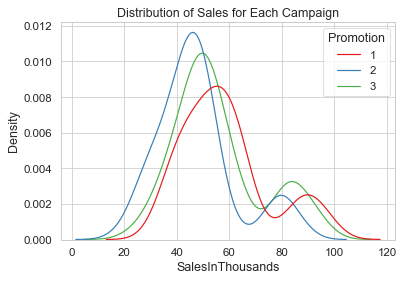

In [46]:
plt.clf()
sns.set_context('paper', font_scale=1.3)
sns.kdeplot(data=df, x='SalesInThousands', hue='Promotion', hue_order=['1', '2', '3'], alpha=0.5)
plt.title('Distribution of Sales for Each Campaign')
plt.show()

Although the standard deviations are within acceptable range, the distributions for the three promotions' sales are bimodal. I will try to look into each market's sales.

In [49]:
small_market = df[df['MarketSize'] == 'Small']

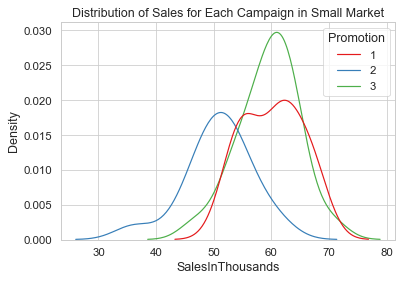

In [50]:
plt.clf()
sns.set_context('paper', font_scale=1.3)
sns.kdeplot(data=small_market, x='SalesInThousands', hue='Promotion', hue_order=['1', '2', '3'], alpha=0.5)
plt.title('Distribution of Sales for Each Campaign in Small Market')
plt.show()

In [51]:
medium_market = df[df['MarketSize'] == 'Medium']

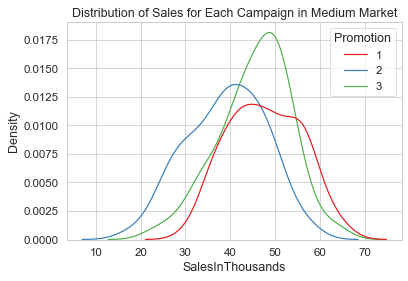

In [52]:
plt.clf()
sns.set_context('paper', font_scale=1.3)
sns.kdeplot(data=medium_market, x='SalesInThousands', hue='Promotion', hue_order=['1', '2', '3'], alpha=0.5)
plt.title('Distribution of Sales for Each Campaign in Medium Market')
plt.show()

In [53]:
large_market = df[df['MarketSize'] == 'Large']

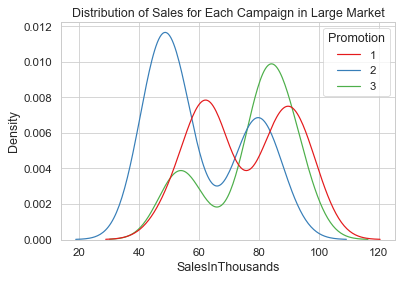

In [54]:
plt.clf()
sns.set_context('paper', font_scale=1.3)
sns.kdeplot(data=large_market, x='SalesInThousands', hue='Promotion', hue_order=['1', '2', '3'], alpha=0.5)
plt.title('Distribution of Sales for Each Campaign in Large Market')
plt.show()

If we look at the distribution for each market size, the small market and the medium market has normally distributed sales record. I will perform ANOVA and Tuket range test on these two market. The large market still has bimodal distribution for all three promotions' sales and they are largely different. I will look more into it after testing the small and the medium markets.

### Tukey's Range Test for Small and Medium Markets

#### Hypothesis Test
- **Null hypothesis**: all promotions equally bring in sales.
- **Alternative hypothesis**: some promotions will bring in more sales than others.

In [57]:
tukey_results_small = pairwise_tukeyhsd(small_market.SalesInThousands, small_market.Promotion, 0.05)
print(tukey_results_small)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     1      2  -9.3519 0.001 -13.6829 -5.0208   True
     1      3  -0.6483   0.9  -4.5579  3.2612  False
     2      3   8.7035 0.001    4.536 12.8711   True
----------------------------------------------------


From the test result above, we can see that promotion 1 and promotion 2 combination rejected null hypothesis, promotion 1 and 3 combination fail to reject null hypothesis, and promotions 2 and 3 rejected null hypothesis. This means that group 1 and group 2, group 3 and group 2 bring in different number of sales, one group brings in more sales than the other group. Group 1 and group 3 bring in similar sales.

In [58]:
tukey_results_medium = pairwise_tukeyhsd(medium_market.SalesInThousands, medium_market.Promotion, 0.05)
print(tukey_results_medium)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -8.5583  0.001 -11.3108 -5.8057   True
     1      3  -2.2037 0.1356  -4.9113  0.5038  False
     2      3   6.3545  0.001   3.7306  8.9785   True
-----------------------------------------------------


The tukey test result for medium market is similar to the small market. Group 1 and group 2, group 3 and group 2 bring in different number of sales, one group brings in more sales than the other group. Group 1 and group 3 bring in similar sales.